#Modelos de Regresión Múltiple

Los modelos de regresión múltiple son aquellos que intentan encontrar una ecuación de tipo:

$$y = f(X),$$

y pueden ser de tipo polinómico y de tipo simple pero con múltiples variables. En este caso &X& podría ser un conjunto de variables predictorias o una sola variable que será sometida a un proceso polinómico.

## Regresión lineal polinómica

Tiene la forma:

$$y = w_0 + w_1x + w_2x^2 + \ldots + x_p^p$$

In [ ]:
#importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#En este caso trabajaremos con un toyset (un dataset generado)

X = np.linspace(-1, 1, 1000) #Un vector desde -1 hasta 1 con 1000 puntos
#Agregamos ruido aleatorio
ruido = np.random.normal(0, 0.333, 1000) #ruido aleatorio con distribución normal
#con media cero, desvición 0.333 y de 1000 puntos
#generamos la variable dependiente y
y = np.sin(4*X) + np.cos(3*X) + ruido

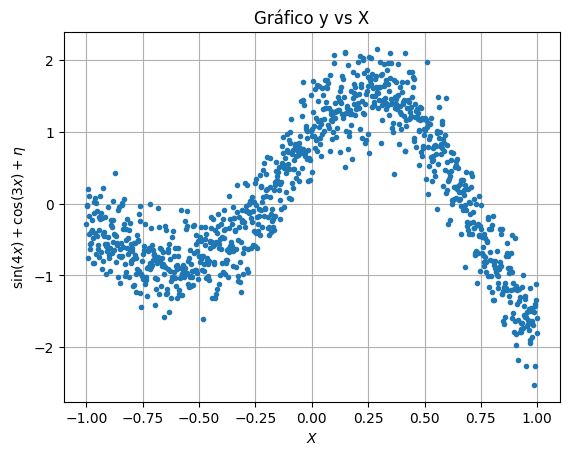

In [ ]:
#graficamos los datos para efectos de visualizar
plt.plot(X, y, '.')
plt.grid()
plt.title("Gráfico y vs X")
plt.xlabel("$X$")
plt.ylabel("$\sin(4x)+\cos(3x)+\eta$")
plt.show()


In [ ]:
#El modelo más sencillo que se´ra un polinomio de grado 1.
model = LinearRegression(fit_intercept=True) #Instanciamos el modelo
X = X.reshape(-1, 1) #organizamos los datos
model.fit(X, y) #Entrenamos el modelo

LinearRegression()

In [ ]:
#Miramos el score para saber el rendimiento del modelo
model.score(X, y)

0.04296197606499186

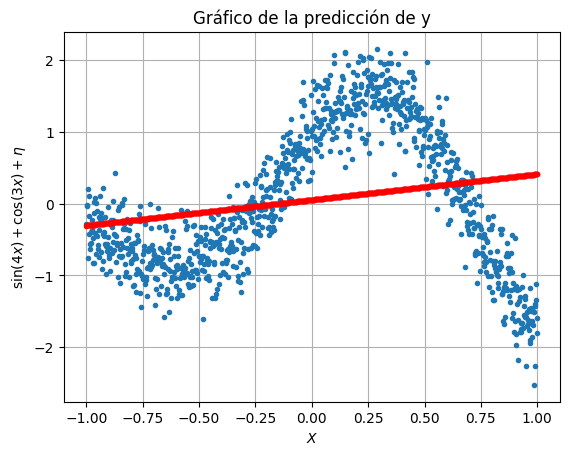

In [ ]:
#Evidentemente el modelo más sencillo es malísimo, vamos a gráficar el resultado
plt.plot(X, y, '.')
plt.plot(X, model.predict(X), 'r.')
plt.grid()
plt.title("Gráfico de la predicción de y")
plt.xlabel("$X$")
plt.ylabel("$\sin(4x)+\cos(3x)+\eta$")
plt.show()


In [ ]:
#vamos a agregar una nueva característica con el fin de agregar
#Un grado más al modelo (polinomio de grado 2)

poly = PolynomialFeatures(degree= 2, include_bias=True)
X_p = poly.fit_transform(X)

#Vamos a revisar el tamaño de X_p
X_p.shape

(1000, 3)

In [ ]:
#Entrenamos el modelo
model.fit(X_p, y)
#calculamos el score
model.score(X_p, y)

0.4718984608067124

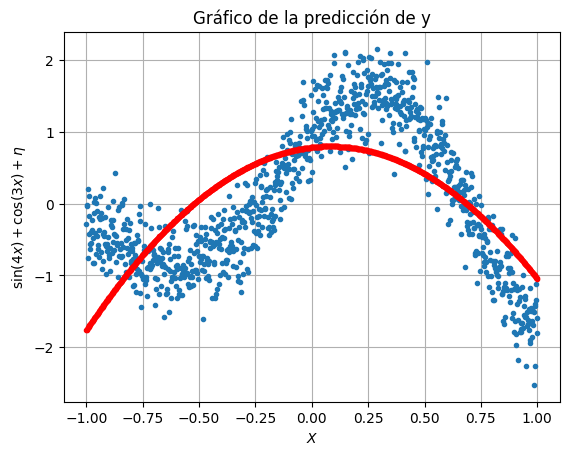

In [ ]:
#Evidentemente el modelo más sencillo es malísimo, vamos a gráficar el resultado
plt.plot(X, y, '.')
plt.plot(X, model.predict(X_p), 'r.')
plt.grid()
plt.title("Gráfico de la predicción de y")
plt.xlabel("$X$")
plt.ylabel("$\sin(4x)+\cos(3x)+\eta$")
plt.show()

In [ ]:
#aumentamos un grado más para revisar los ajustes

poly = PolynomialFeatures(degree= 3, include_bias=True)
X_p = poly.fit_transform(X)

#Entrenamos el modelo
model.fit(X_p, y)
#calculamos el score
model.score(X_p, y)

0.839203492280773

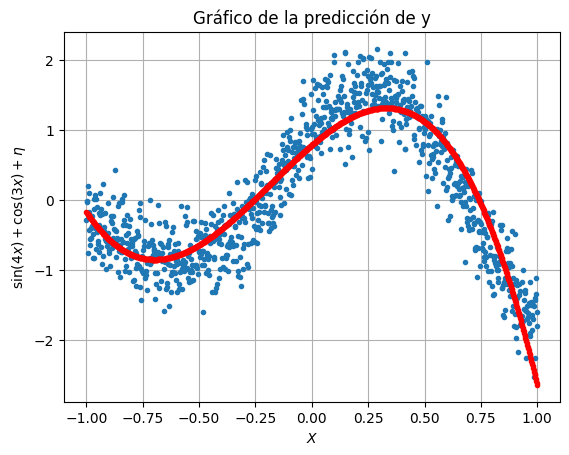

In [ ]:
#graficamos para revisar el ajuste de los datos
plt.plot(X, y, '.')
plt.plot(X, model.predict(X_p), 'r.')
plt.grid()
plt.title("Gráfico de la predicción de y")
plt.xlabel("$X$")
plt.ylabel("$\sin(4x)+\cos(3x)+\eta$")
plt.show()

Pareciera que entre más alto el grado del modelo, mejor precide. Vamos a probarlo

In [17]:
#cargamos la libreria para la creación de pipelines

from sklearn.pipeline import Pipeline

#Instanciamos la secuencia de procesos que queremos aplicar a los datos
#Para el pipeline se crea una lista de tuplas, cada tupla está conformada por la pareja ('variable', función)

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('model', LinearRegression(fit_intercept=True))])

#Creamos un vector con todos los grados del polinomio que queremos probar
#En este caso probaremos desde el 2 hasta el 16
degrees = range(2,16)

#vamos a crear una lista vacía para almacenas los scores que resulten de evaluar las regresiones polinomicas con cada uno de los grados
scores = []
#Implementamos el ciclo que recorra todos los grados que queremos probar
for degree in degrees:
  #ajustamos el grado del polinomio
  scores.append(pipe.set_params(poly__degree = degree).fit(X, y).score(X, y))

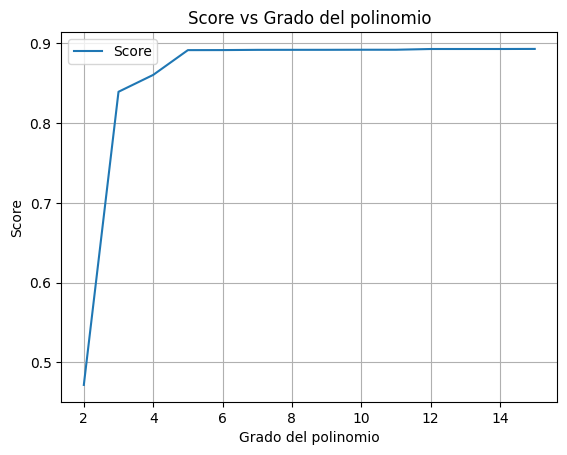

In [18]:
#gráficamos los scores para analizar los resultados
plt.plot(degrees, scores, '-', label = "Score")
plt.legend(loc = "best")
plt.grid()
plt.xlabel("Grado del polinomio")
plt.ylabel("Score")
plt.title("Score vs Grado del polinomio")
plt.show()

Depués del grado 5 no hay ninguna mejora
Cando estoy por debajo de lo bueno que puedo dar es una estimación y cuando estoy encima del punto estoy en subestimación

##Evaluación de Modelos

Después de cierto grado, el modelo parece que no tiene una mejora apreciable. Pero, ¿los modelos más complejos predicen mejor?
Eso solo podemos saberlo con datos diferentes a los usados para entender el modelo.

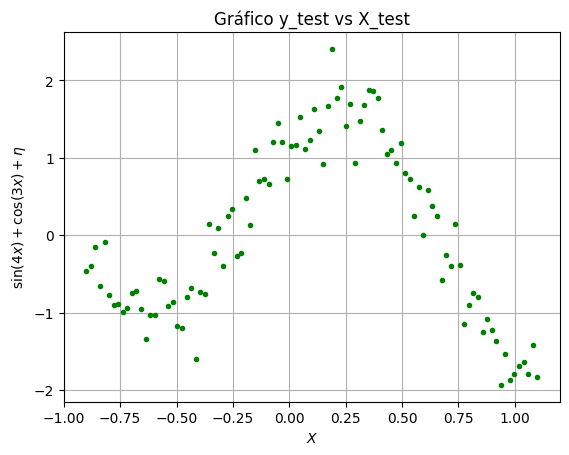

In [25]:
#Vamos a generar otro conjunto de datos que el modelo aún no conoce
X_test = np.linspace(-0.9, 1.1, 100)
ruido = np.random.normal(0, 0.333, 100)

y_test = np.sin(4*X_test) + np.cos(3*X_test) + ruido

#graficamos los datos de prueba
plt.plot(X_test, y_test, '.g')
plt.grid()
plt.title("Gráfico y_test vs X_test")
plt.xlabel("$X$")
plt.ylabel("$\sin(4x)+\cos(3x)+\eta$")
plt.show()


In [26]:
#cargamos la libreria para la creación de pipelines

from sklearn.pipeline import Pipeline

#Instanciamos la secuencia de procesos que queremos aplicar a los datos
#Para el pipeline se crea una lista de tuplas, cada tupla está conformada por la pareja ('variable', función)

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('model', LinearRegression(fit_intercept=True))])

#Creamos un vector con todos los grados del polinomio que queremos probar
#En este caso probaremos desde el 2 hasta el 16
degrees = range(2,16)

#vamos a crear una lista vacía para almacenas los scores que resulten de evaluar las regresiones polinomicas con cada uno de los grados
scores_train = []
scores_test = []
#Implementamos el ciclo que recorra todos los grados que queremos probar
for degree in degrees:
  #ajustamos el grado del polinomio
  scores_train.append(pipe.set_params(poly__degree = degree).fit(X, y).score(X, y))
  scores_test.append(pipe.score(X_test.reshape(-1,1), y_test))

In [ ]:
#graficamos los scores para analizar los resultados
plt.plot(degrees, scores_train, '-', label = "Scores_train")
plt.plot(degrees, scores_test, '-r', label = "Scores_test")
plt.legend(loc = "best")
plt.grid()
plt.xlabel("Grado del polinomio")
plt.ylabel("Score")
plt.title("Score vs Grado del polinomio")
plt.show()

##Regresión Múltiple

El la regresión multiple tenemos diferentes características regresoras, y la ecuación tendría la forma:

$$y = w_0 + w_1x[1] + w_2x[2] + \ldots w_Dx[D]$$

#para nuestro ejemplo haremos la predicción del precio de un inmueble a partir de diversas características



In [31]:
#Cargamos los datos del archivo csv
data = pd.read_csv("/content/drive/MyDrive/Aprendizaje Supervisado/Real estate.csv")
data.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [32]:
#revisamos la información estadística básica para observar la calidad de los datos
data.describe()

#De lo que se puede observar no hay datos nulos, ni datos atípicos y todas las características son de naturaleza cuantitativa.

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [35]:
#Separemos el vector de datos a predecir (y)
y =data["Y house price of unit area"].copy ()
#Revisamos el tamaño de Y
y.shape

(414,)

In [36]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [37]:
#separamos las datos de las variables predictorias (X)
#Creamos una lisra con las variables que no nos sirvan
cols_top_drop = ["No", "X1 transaction date", "Y house price of unit area"]

#Creamos un dataframe con las variables predictorias
X = data.drop(cols_top_drop, axis = 1).copy()


In [38]:
#Revisamos el tamaño de X
X.shape

(414, 5)

In [39]:
#Con fines de hacer la evaluación del modelo, haremos validación cruzada o cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(LinearRegression(fit_intercept = True),
                        X, y, cv = 5, scoring = "r2")

In [40]:
score.mean()

0.5766950593066399

In [43]:
score_RMS = cross_val_score(LinearRegression(fit_intercept = True),
                        X, y, cv = 5, scoring = "neg_mean_squared_error")

In [44]:
-score_RMS.mean()

79.94377773067188